In [2]:

import networkx as nx
import osmnx as ox
import time

In [15]:
ox.settings.useful_tags_way += ["place", 'maxspeed']
G = ox.graph_from_place('Hungary', network_type='drive')
        

In [95]:
# NOT WORKING

def reconstruct_path(cameFrom, current):
    total_path = {current}
    while current in cameFrom.keys():
        current = cameFrom[current]
        total_path.append(current)
    return total_path.reverse()


def d(G, source, target, cameFrom):
    hour = int(time.strftime("%H"))
    if "length" in G.edges[(source, target, 0)]:
        length = G.edges[(source, target, 0)]["length"]
    else:
        length = 50
        
    while "maxspeed" not in G.edges[(source, target, 0)] and source in cameFrom:
        if source in cameFrom:
            target = source
            source = cameFrom[source]
                              
    if "maxspeed" in G.edges[(source, target, 0)]:
        maxspeed = G.edges[(source, target, 0)]["maxspeed"]
    else:
        maxspeed = 70

    if hour < 17 and hour > 7: # day
        return (150-maxspeed)*length
    else:
        return int(maxspeed)*length

def h(G, current, target):
    c = G.nodes[current]
    t = G.nodes[target]
    return abs(c['x'] - t['x'])+abs(c['y'] - t['y'])
    
    
def safest_path(G, source, target):
    print("START")
    pool = [source]
    adj = G._adj
    came_from = {}
    gScore = {source: 0}
    fScore = {source: h(G, source, target)}
    current = None
    while pool != []:
        print(pool)
        min_node = pool[0]
        for node in pool:
            if fScore[node] < fScore[min_node]:
                min_node = node
        
        if current == target:
            return reconstruct_path(cameFrom, current)
        
        current = min_node
        print(fScore[current])
        pool.remove(node)
        
        for neighbor_id, neighbor_data in adj[current].items():
            print("NEIGH")
            neighbor_data = neighbor_data[0]
            
            tentative_gScore = gScore[current] + d(G, current, neighbor_id, came_from) 
            if neighbor_id not in gScore or tentative_gScore < gScore[neighbor_id]:
                came_from[neighbor_id] = current
                gScore[neighbor_id] = tentative_gScore
                fScore[neighbor_id] = gScore[neighbor_id] + h(G, current, target)
                if neighbor_id not in pool:
                    pool.append(neighbor_id)
                    
    return None
            
        
        
            
        
            

In [120]:
# WORKING

def w(source, target, d):
    
    hour = int(time.strftime("%H"))
    if "length" in G.edges[(source, target, 0)]:
        length = G.edges[(source, target, 0)]["length"]
    else:
        length = 50
        
                              
    if "maxspeed" in G.edges[(source, target, 0)]:
        maxspeed = G.edges[(source, target, 0)]["maxspeed"]
        if type(maxspeed)==list:
            maxspeed = maxspeed[0]
    else:
        maxspeed = 70

    if hour < 17 and hour > 7: # day
        return (150-maxspeed)*length
    else:
        return int(maxspeed)*length

In [121]:
def get_route(source_geo, dest_geo, go_type='drive', weight='travel_time',plot=True):
    source_node, dist = ox.nearest_nodes(G, source_geo[0], source_geo[1], return_dist=True)
    target_node, dist = ox.nearest_nodes(G, dest_geo[0], dest_geo[1], return_dist=True)
    route = nx.shortest_path(G, source_node, target_node, weight=w)
    
    edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, 'length') 
    total_route_length = round(sum(edge_lengths), 1)
    if plot:
      ox.plot_graph_route(G, route, node_size=0, figsize=(40,40))
    return route, total_route_length

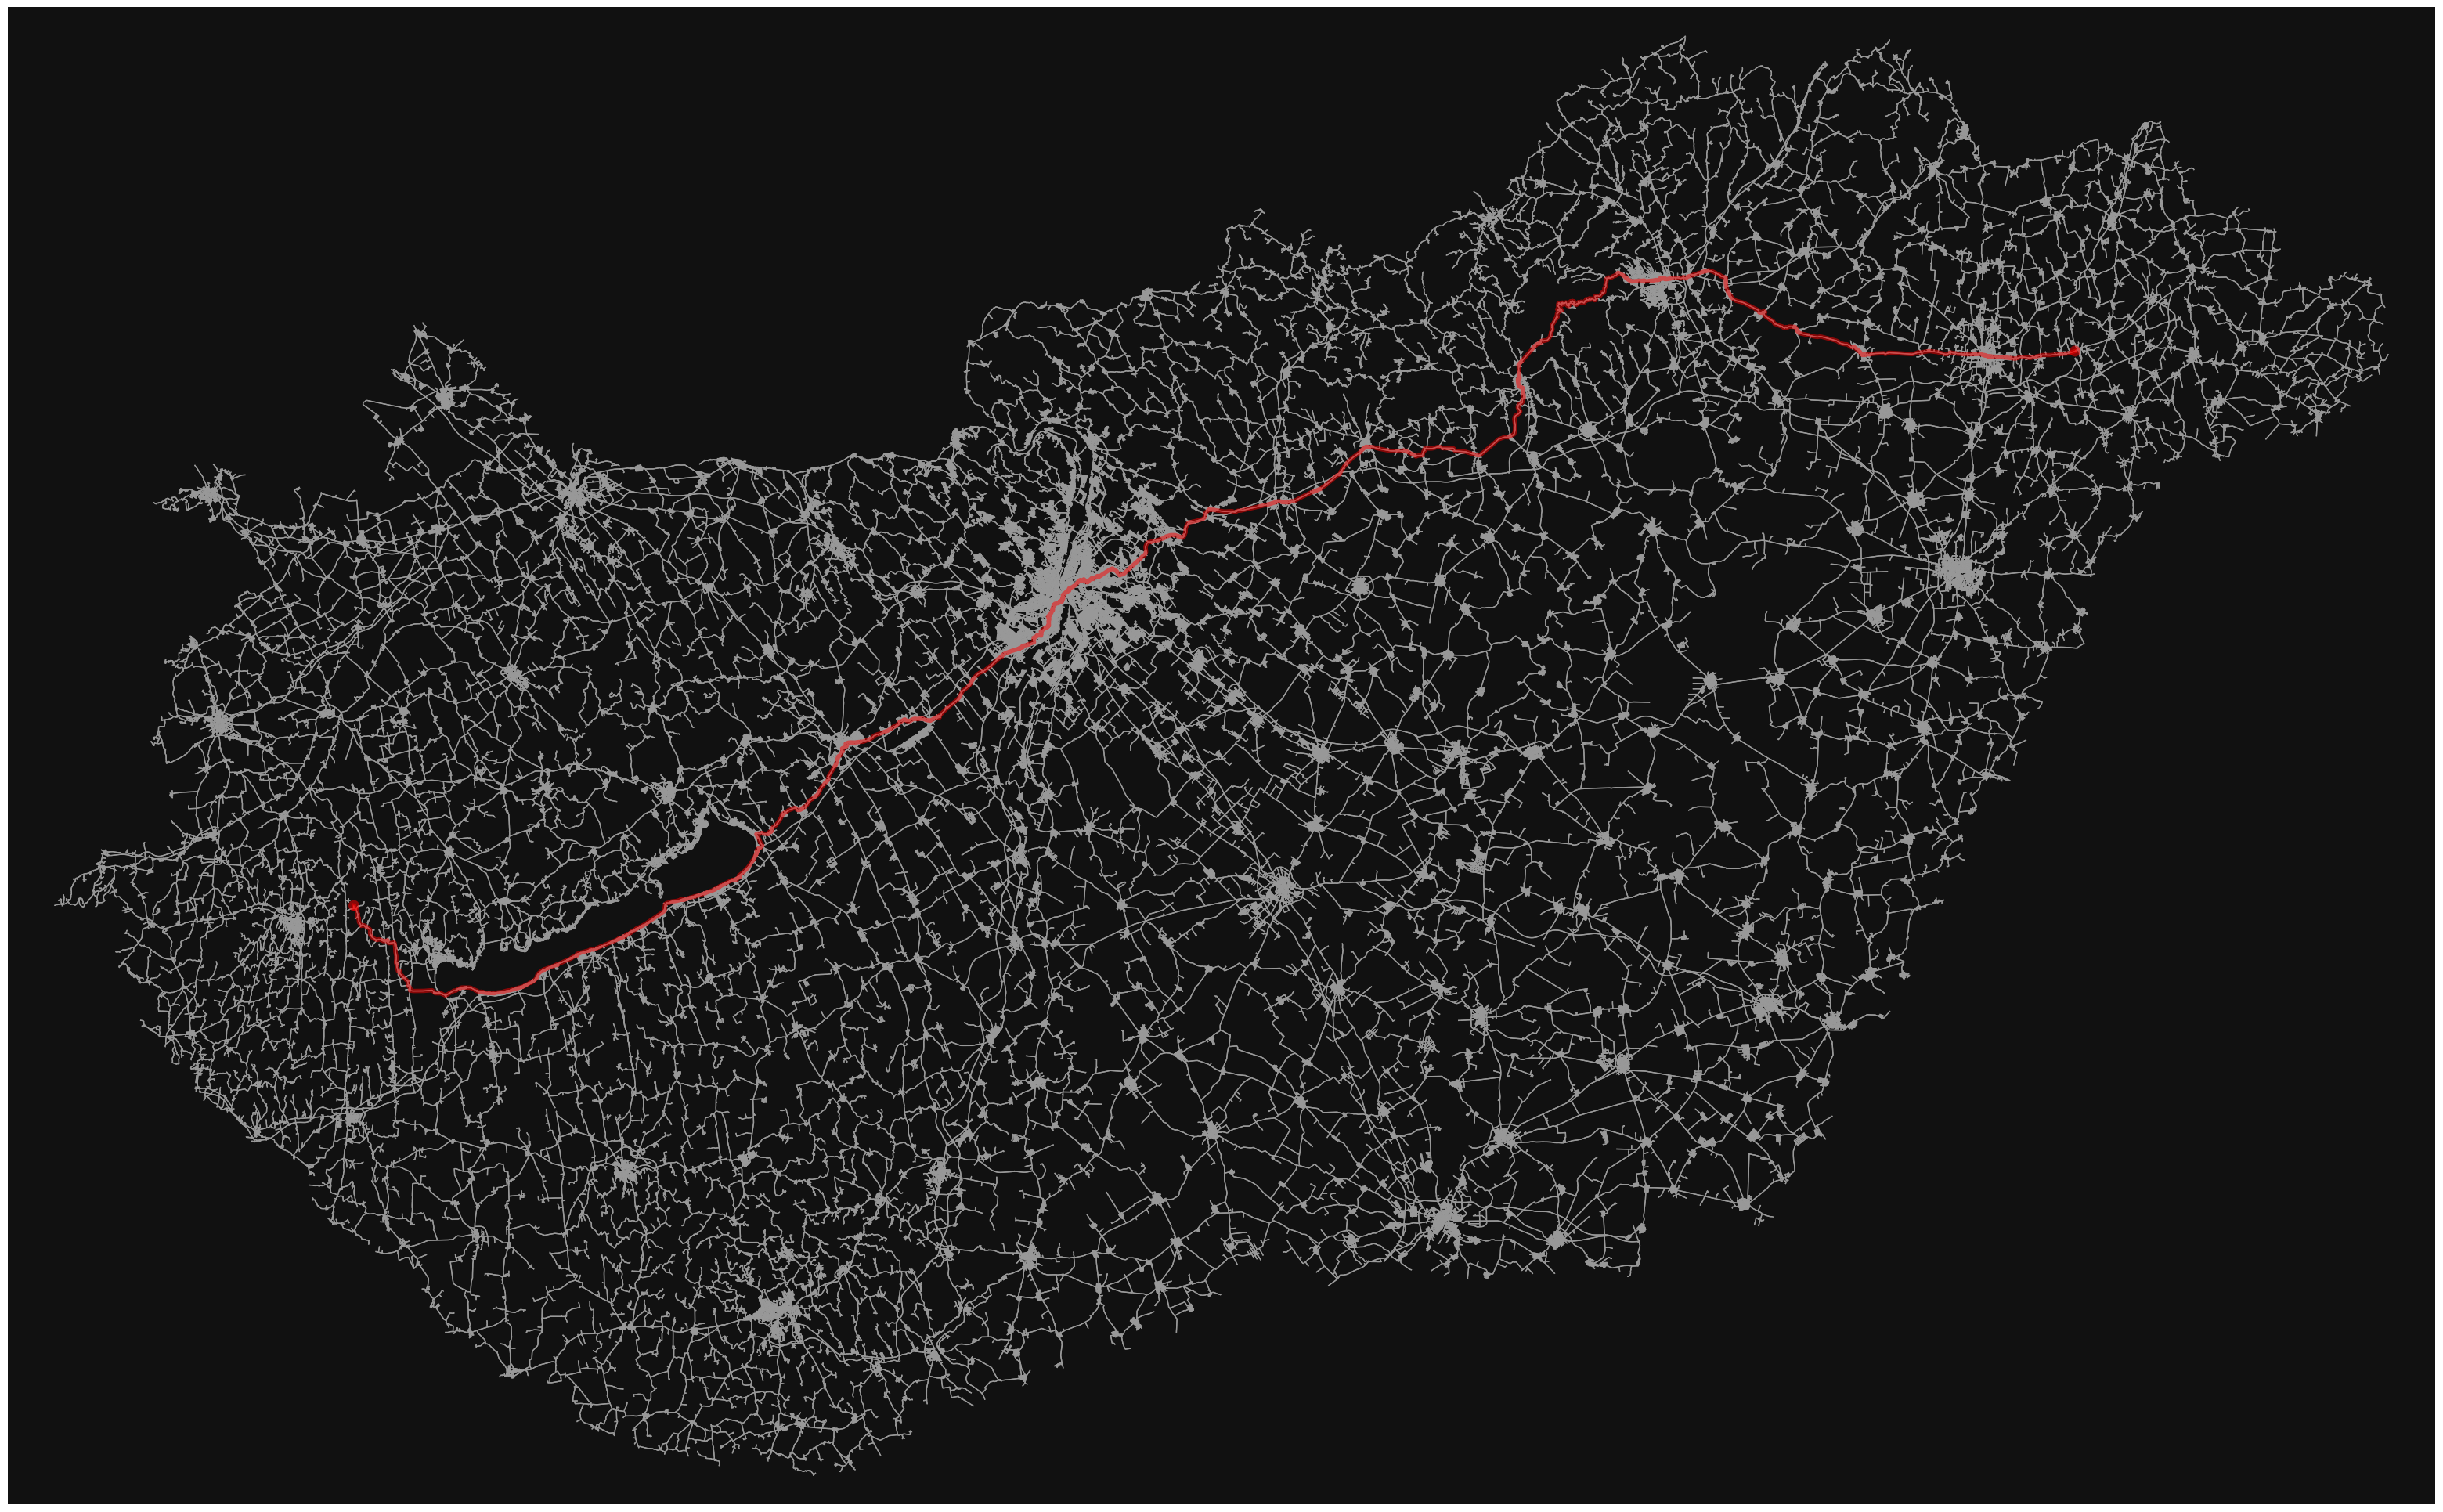

In [123]:
source_loc = (17.001899, 46.877254)
target_loc = (21.973212, 47.966179)
route, length = get_route(source_loc, target_loc)